# Verfication of total CO2 capture
Equations: 
![title](documents/co2_equation.png)
Data:
documents\20240219_QAQC-calculation_of_Total_CO2_capture.xlsx

In [32]:
import os, sys
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scienceplots
import pandas as pd
import ipywidgets as widgets

In [33]:
plt.style.use(['science','notebook','no-latex'])
plt.rcParams['figure.figsize'] = [8, 6]

In [34]:
test_data = "documents/20240219_QAQC-calculation_of_Total_CO2_capture.xlsx"

In [35]:
# load raw data, separator is tab
raw = pd.read_excel(test_data)
# remove extra spaces in column names
raw.columns = raw.columns.str.strip() 
raw

,sim,state,soln,dist_x,time,step,pH,pe,N,Na,...,k_Ilmenite,dk_Ilmenite,k_Glass,dk_Glass,k_MikeSorghum,dk_MikeSorghum,SurfH_Ca,SurfH_Mg,SurfH_H,Hfo_PO4
0,1.0,i_soln,0.0,-99.000,-9.900000e+01,-99.0,8.10000,4.0000,0.000464,0.00018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00
1,1.0,i_soln,1.0,-99.000,-9.900000e+01,-99.0,8.10000,4.0000,0.000464,0.00018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00
2,1.0,react,0.0,-99.000,0.000000e+00,1.0,7.73951,11.3070,0.000464,0.00018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00
3,2.0,i_exch,1.0,-99.000,-9.900000e+01,-99.0,8.10000,4.0000,0.000464,0.00018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00
4,3.0,i_surf,1.0,-99.000,-9.900000e+01,-99.0,8.10000,4.0000,0.000464,0.00018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.023499,0.001308,0.080543,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4216,1.0,transp,10.0,0.475,1.578250e+08,382.0,7.17319,11.9074,0.000448,0.00025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.010188,0.000623,0.120180,1.279300e-11
4217,1.0,transp,11.0,0.525,1.578250e+08,382.0,8.18386,10.6964,0.000447,0.00025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00
4218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# column names
column_names = raw.columns.values.tolist()
print(column_names)

['sim', 'state', 'soln', 'dist_x', 'time', 'step', 'pH', 'pe', 'N', 'Na', 'Ca', 'Mg', 'K', 'Al', 'Si', 'Fe', 'Mn', 'Sr', 'Ba', 'P', 'C(4)', 'Hfo_s', 'Hfo_w', 'm_CaX2', 'm_KX', 'm_MgX2', 'm_NaX', 'm_FeX2', 'm_MnX2', 'm_SrX2', 'm_AlX3', 'm_BaX2', 'm_Hfo_wH2PO4', 'm_Hfo_wHPO4-', 'Al(OH)3(a)', 'd_Al(OH)3(a)', 'Calcite', 'd_Calcite', 'SiO2(a)', 'd_SiO2(a)', 'Gibbsite', 'd_Gibbsite', 'Goethite', 'd_Goethite', 'Kaolinite', 'd_Kaolinite', 'Fe(OH)3(a)', 'd_Fe(OH)3(a)', 'Pyrolusite', 'd_Pyrolusite', 'si_Al(OH)3(a)', 'si_Calcite', 'si_SiO2(a)', 'si_Gibbsite', 'si_Fe(OH)3(a)', 'si_Pyrolusite', 'si_Kaolinite', 'si_Quartz', 'si_Plagioclase', 'si_Apatite', 'si_Diopside_Mn', 'si_Diopside', 'si_Olivine', 'si_Alkali-feldspar', 'si_Montmorillonite', 'si_Ilmenite', 'si_Glass', 'k_Quartz', 'dk_Quartz', 'k_Plagioclase', 'dk_Plagioclase', 'k_Apatite', 'dk_Apatite', 'k_Diopside_Mn', 'dk_Diopside_Mn', 'k_Diopside', 'dk_Diopside', 'k_Olivine', 'dk_Olivine', 'k_Alkali-feldspar', 'dk_Alkali-feldspar', 'k_Montmori

In [37]:
# add two columns: years and days, time column is in seconds
raw['days'] = raw['time'] / 86400
raw['years'] = raw['time'] / 31536000

In [38]:
# drop rows with time < 0
df = raw[raw['time'] >= 0.0]
raw = None

In [39]:
unit_converter = (500000/10)*44/1000000

In [40]:
# soil calcite
# select solution 1-10, average 1-10 by years
soil_c = (df[df['soln'].between(1,10, inclusive='both')])[["step","years","Calcite"]].groupby("step").mean()
# convert to M (tones CO2/ha)
soil_c['Calcite'] = soil_c['Calcite']*(500000*44)/1000000
# rename
soil_c.rename(columns={"Calcite": "Soil_Calcite"},inplace = True)


<Axes: title={'center': 'Soil Calcite'}, xlabel='years', ylabel='Carbon captuere\n(tones CO2/ha)'>

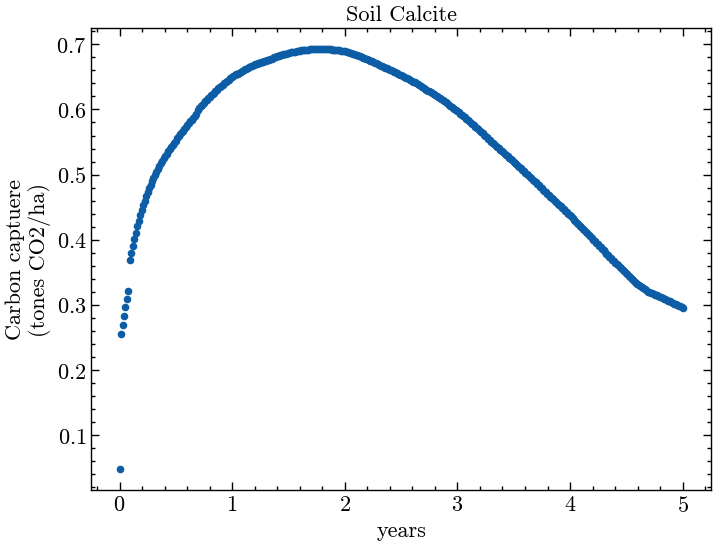

In [41]:
soil_c.plot.scatter(x="years",y="Soil_Calcite", title="Soil Calcite",ylabel="Carbon captuere\n(tones CO2/ha)")

In [42]:
# Effluent calcite
# select solution 11, average 11 by years
eff_c = (df[df['soln'] == 11])[["step","years","Calcite"]].groupby('step').mean()
# convert to M (tones CO2/ha)
eff_c['Calcite'] = eff_c['Calcite']*unit_converter
# rename
eff_c.rename(columns={"Calcite": "Effluent_Calcite"},inplace = True)

<Axes: title={'center': 'Effluent Calcite'}, xlabel='years', ylabel='Carbon captuere\n(tones CO2/ha)'>

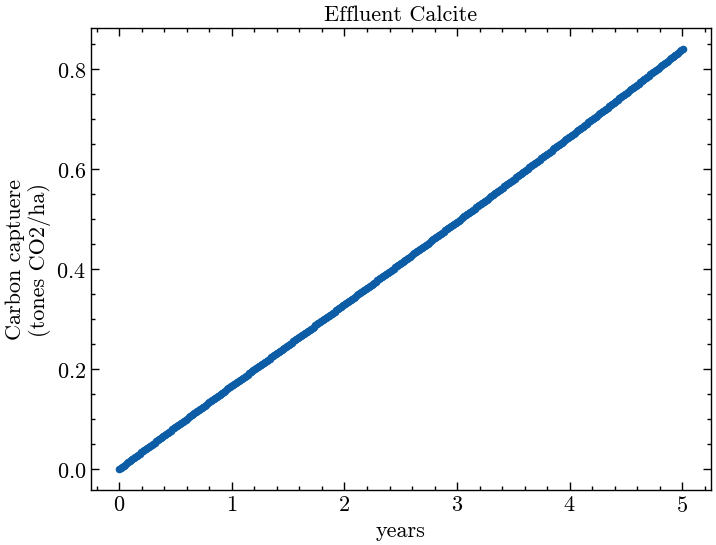

In [43]:
eff_c.plot.scatter(x="years",y="Effluent_Calcite",title="Effluent Calcite",ylabel="Carbon captuere\n(tones CO2/ha)")

In [44]:
# 'Effluent bicarbonate' shall use C(4) rather than Calcite
# select solution 11, average 11 by years
eff_b = (df[df['soln'] == 11])[["step","years","C(4)"]].groupby('step').mean()
# convert to M (tones CO2/ha)
eff_b['C(4)'] = eff_b['C(4)']*unit_converter
eff_b['Effluent_bicarbonate']=eff_b["C(4)"].cumsum()

<Axes: title={'center': 'Effluent Bicarbonate'}, xlabel='years', ylabel='Carbon captuere\n(tones CO2/ha)'>

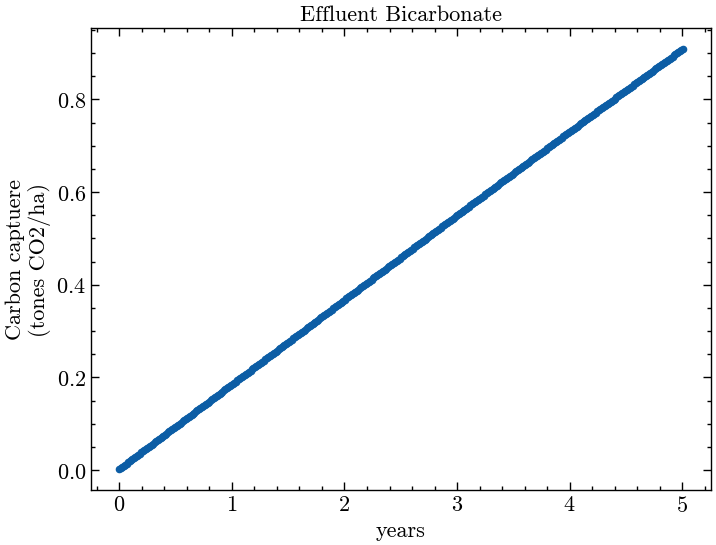

In [45]:
eff_b.plot.scatter(x="years",y=["Effluent_bicarbonate"],title="Effluent Bicarbonate",ylabel="Carbon captuere\n(tones CO2/ha)")

In [46]:
eff_c["Soil_Calcite"]= soil_c["Soil_Calcite"]
eff_c["Effluent_bicarbonate"]=eff_b["Effluent_bicarbonate"]
eff_c["Total_Capture"] = eff_c['Effluent_bicarbonate'] + eff_c["Effluent_Calcite"]+eff_c["Soil_Calcite"]

<Axes: title={'center': 'Total Capture'}, xlabel='years', ylabel='Carbon captuere\n(tones CO2/ha)'>

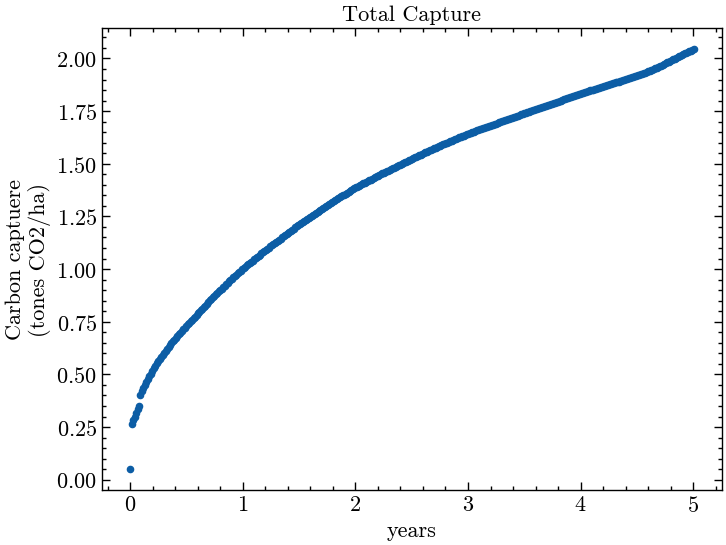

In [47]:
eff_c.plot.scatter(x="years",y=["Total_Capture"],title="Total Capture",ylabel="Carbon captuere\n(tones CO2/ha)")

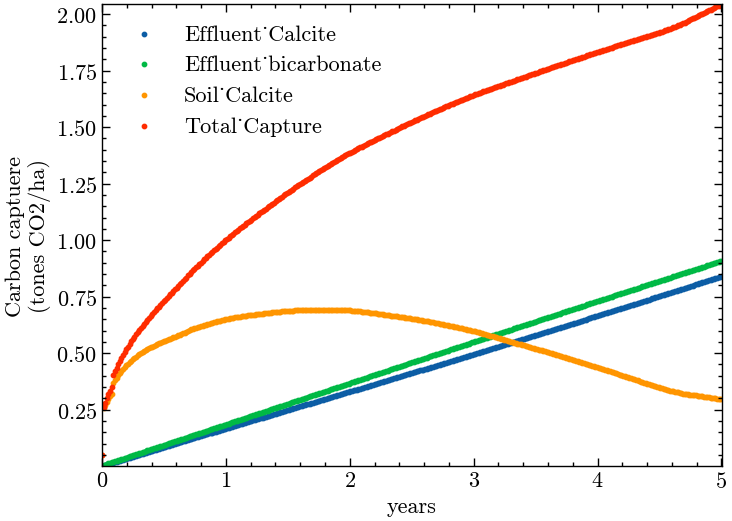

In [48]:
# plot everything together
fig, ax = plt.subplots()
columns = ['Effluent_Calcite','Effluent_bicarbonate','Soil_Calcite','Total_Capture']
for column in columns:
    ax.scatter(x = eff_c['years'], y= eff_c[column], label=column,s=10)
ax.set_xlabel('years')
ax.set_ylabel("Carbon captuere\n(tones CO2/ha)")
ax.legend()
ax.autoscale(tight=True)


In [49]:
eff_c.to_csv("co2capature_verfication.csv")

## Verfication

In [50]:
# load raw data
verfi_data="documents/20240219_QAQC-calculation_of_Total_CO2_capture_updated.xlsx"
raw = pd.read_excel(verfi_data,sheet_name=1)
# remove extra spaces in column names
raw.columns = raw.columns.str.strip() 
raw

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,year,Toal CO2 capture,"soil calcite, ton_CO2/ha_soil","bicarbonate, ton_CO2/ha_soil","effluent calcite, ton_CO2/ha_soil",Unnamed: 16,Total CO2,"correctted soil calcite, ton_CO2/ha_soil"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.089483,0.087136,0.002143,0.000205,NaN,0.050489,0.048141
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013101,0.469485,0.462509,0.004538,0.002438,NaN,0.262506,0.255530
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026202,0.499858,0.488257,0.006932,0.004669,NaN,0.281356,0.269755
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.039303,0.528990,0.512766,0.009327,0.006898,NaN,0.299521,0.283296
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052404,0.557289,0.536443,0.011721,0.009125,NaN,0.317223,0.296377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.952182,2.273652,0.542846,0.899338,0.831468,NaN,2.030721,0.299915
379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.965278,2.276190,0.540764,0.901649,0.833778,NaN,2.034191,0.298764
380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.978406,2.278713,0.538665,0.903960,0.836088,NaN,2.037653,0.297605
381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.991502,2.281219,0.536551,0.906270,0.838398,NaN,2.041105,0.296437


In [51]:
column_names = raw.columns.values.tolist()
unnamed = [x for x in column_names if "Unnamed" in x]
raw.drop(columns=unnamed,inplace=True)

In [55]:
raw.rename(columns={"year":"years","Total CO2":"Total_Capture","correctted soil calcite, ton_CO2/ha_soil":"Soil_Calcite","bicarbonate, ton_CO2/ha_soil":"Effluent_bicarbonate","effluent calcite, ton_CO2/ha_soil":"Effluent_Calcite"},inplace=True)
#'Effluent_Calcite','Effluent_bicarbonate','Soil_Calcite','Total_Capture'
raw

,years,Toal CO2 capture,"soil calcite, ton_CO2/ha_soil",Effluent_bicarbonate,Effluent_Calcite,Total_Capture,Soil_Calcite
0,0.000000,0.089483,0.087136,0.002143,0.000205,0.050489,0.048141
1,0.013101,0.469485,0.462509,0.004538,0.002438,0.262506,0.255530
2,0.026202,0.499858,0.488257,0.006932,0.004669,0.281356,0.269755
3,0.039303,0.528990,0.512766,0.009327,0.006898,0.299521,0.283296
4,0.052404,0.557289,0.536443,0.011721,0.009125,0.317223,0.296377
...,...,...,...,...,...,...,...
378,4.952182,2.273652,0.542846,0.899338,0.831468,2.030721,0.299915
379,4.965278,2.276190,0.540764,0.901649,0.833778,2.034191,0.298764
380,4.978406,2.278713,0.538665,0.903960,0.836088,2.037653,0.297605
381,4.991502,2.281219,0.536551,0.906270,0.838398,2.041105,0.296437


<Axes: title={'center': 'Soil Calcite (green-jupyter, blue-excel)'}, xlabel='years', ylabel='Carbon captuere\n(tones CO2/ha)'>

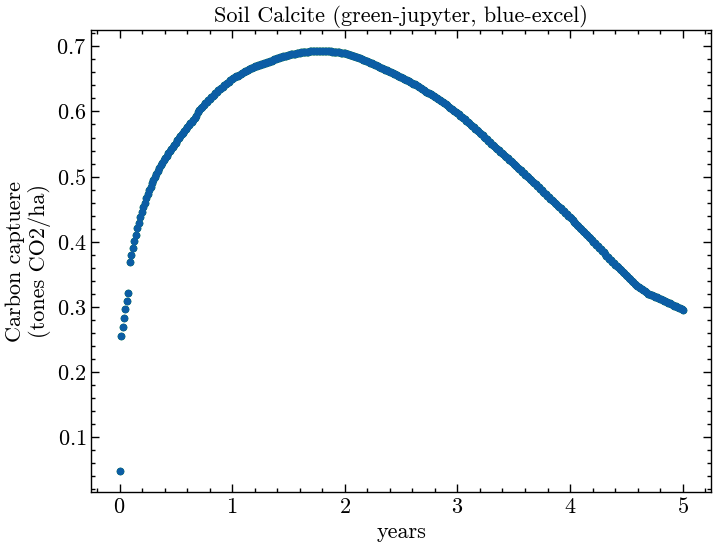

In [56]:
# Soil_Caclcite
eff_c["Soil_Calcite"]=eff_c["Soil_Calcite"]
ax=eff_c.plot.scatter(x="years",y="Soil_Calcite",color="g");
raw.plot.scatter(x="years",y="Soil_Calcite", ax=ax,title="Soil Calcite (green-jupyter, blue-excel)",ylabel="Carbon captuere\n(tones CO2/ha)")


<Axes: title={'center': 'Effluent_bicarbonate (green-jupyter, blue-excel)'}, xlabel='years', ylabel='Carbon captuere\n(tones CO2/ha)'>

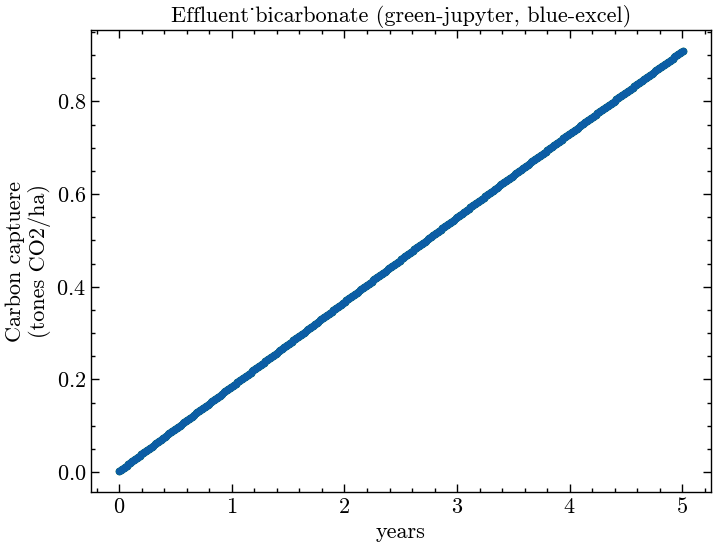

In [57]:
#Effluent_bicarbonate	
ax=eff_c.plot.scatter(x="years",y="Effluent_bicarbonate",color="g");
raw.plot.scatter(x="years",y="Effluent_bicarbonate", ax=ax,title="Effluent_bicarbonate (green-jupyter, blue-excel)",ylabel="Carbon captuere\n(tones CO2/ha)")

<Axes: title={'center': 'Effluent_Calcite (green-jupyter, blue-excel)'}, xlabel='years', ylabel='Carbon captuere\n(tones CO2/ha)'>

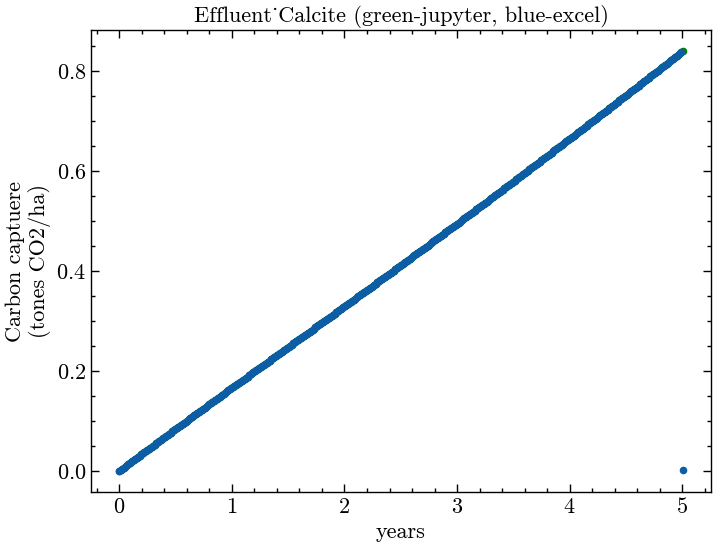

In [58]:
#Effluent_Calcite	
ax=eff_c.plot.scatter(x="years",y="Effluent_Calcite",color="g");
raw.plot.scatter(x="years",y="Effluent_Calcite", ax=ax,title="Effluent_Calcite (green-jupyter, blue-excel)",ylabel="Carbon captuere\n(tones CO2/ha)")

<Axes: title={'center': 'Total_Capture (green-jupyter, blue-excel)'}, xlabel='years', ylabel='Carbon captuere\n(tones CO2/ha)'>

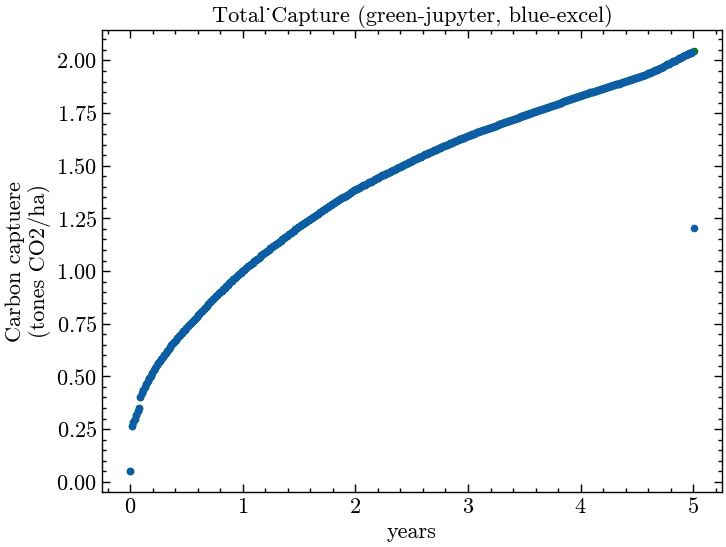

In [59]:
#Total_Capture	
ax=eff_c.plot.scatter(x="years",y="Total_Capture",color="g");
raw.plot.scatter(x="years",y="Total_Capture", ax=ax,title="Total_Capture (green-jupyter, blue-excel)",ylabel="Carbon captuere\n(tones CO2/ha)")